# Predicting Customer Churn.

## Overview

## Business and Data Understanding

#### Business Understanding

In [172]:
# Import the necessary modules
# Modules dealing with data and visualizations
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statsmodels as statsmd

# Modules for modelling
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier


>> * **Loading and viewing the dataset**

In [173]:
# Loading the datset
df = pd.read_csv('churndata.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Data Understanding

>>> * *This section is meant to view and understand the data as well as get the domain knowlede needed to continue with analysis.*

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [175]:
# Descriptive Statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [176]:
df.shape

(3333, 21)

* From the above cells we can see that the data set contains 3,333 rows and 21 columns. The information tells us that there are no null counts / values

#### Data Preparation

##### EDA

* This section explores the data and analyses the relationship between features in the dataset

In [177]:
# Creating a function to view columns
def col_info(data):
    
    "This is a simple function to help describe the column data types"
    
    print('col_names: \n', data.columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('num_cols: \n', data.select_dtypes(int).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('cat_cols: \n', data.select_dtypes(object).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('boolean_cols: ', data.select_dtypes(bool).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('float_cols: \n', data.select_dtypes(float).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('The shape: ', data.shape)
    print('=====================================================================================')
    print('=====================================================================================')
    print(f"There are {len(data.select_dtypes(int).columns)} numeric type columns, {len(data.select_dtypes(object).columns)} object type columns\
     and {len(data.select_dtypes(float).columns)} float type columns out of {df.shape[1]}")
    

In [178]:
col_info(df) 

col_names: 
 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
num_cols: 
 Index(['account length', 'area code', 'number vmail messages',
       'total day calls', 'total eve calls', 'total night calls',
       'total intl calls', 'customer service calls'],
      dtype='object')
cat_cols: 
 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')
boolean_cols:  Index(['churn'], dtype='object')
float_cols: 
 Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total ni

In [179]:
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    missing = data.isna().sum().sum()
    duplicated = data.duplicated().sum()
    return (f"There are '{missing}' missing values and '{duplicated}' duplicated values in the dataset")

In [180]:
cleaning(df)

"There are '0' missing values and '0' duplicated values in the dataset"

In [181]:
# Dropping phonenumber column because it is not useful in analysis
dropped = df.drop('phone number', axis=1, inplace=True)

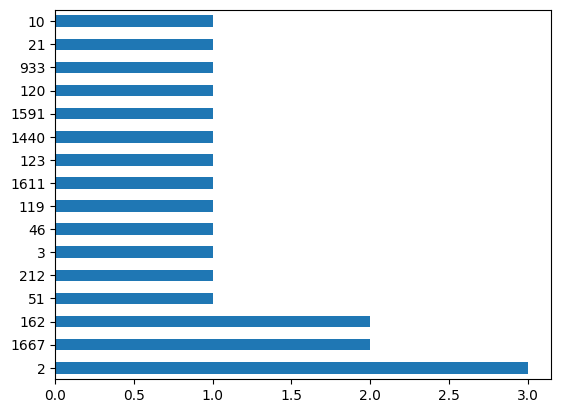

In [182]:
# Visualizing unique entries
df.nunique().value_counts().plot.barh();


In [183]:
# sns.pairplot(data=df)

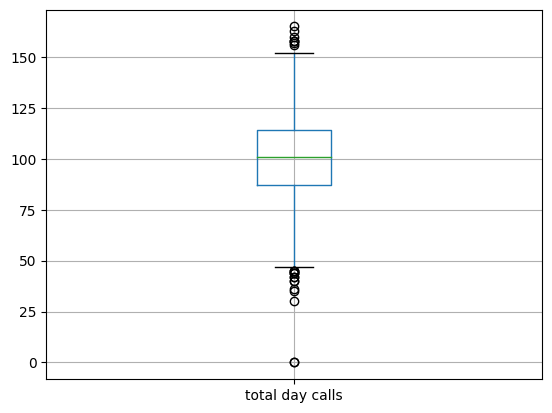

In [184]:
# Checking for Outliers
df.boxplot('total day calls')
plt.show()

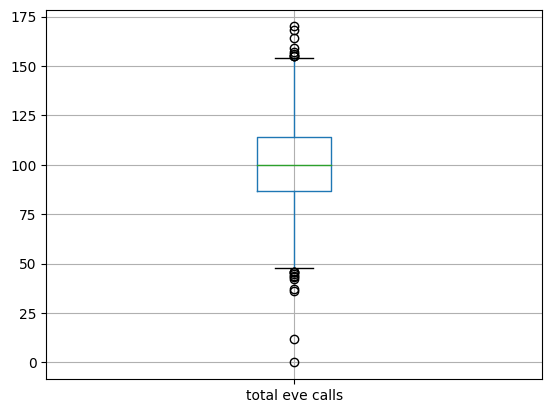

In [185]:
df.boxplot('total eve calls')
plt.show()

<AxesSubplot: >

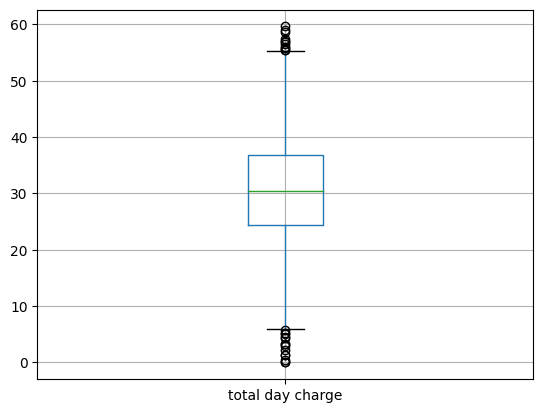

In [186]:
df.boxplot('total day charge')

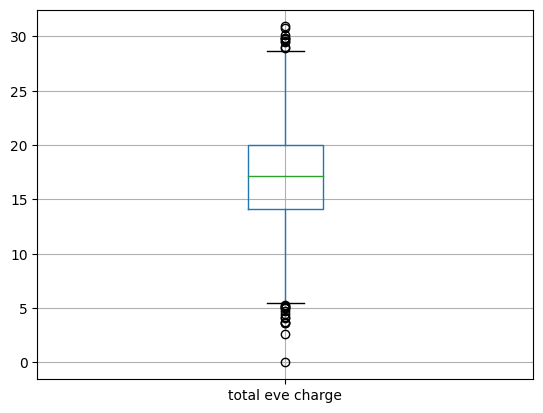

In [187]:
df.boxplot('total eve charge')
plt.show()

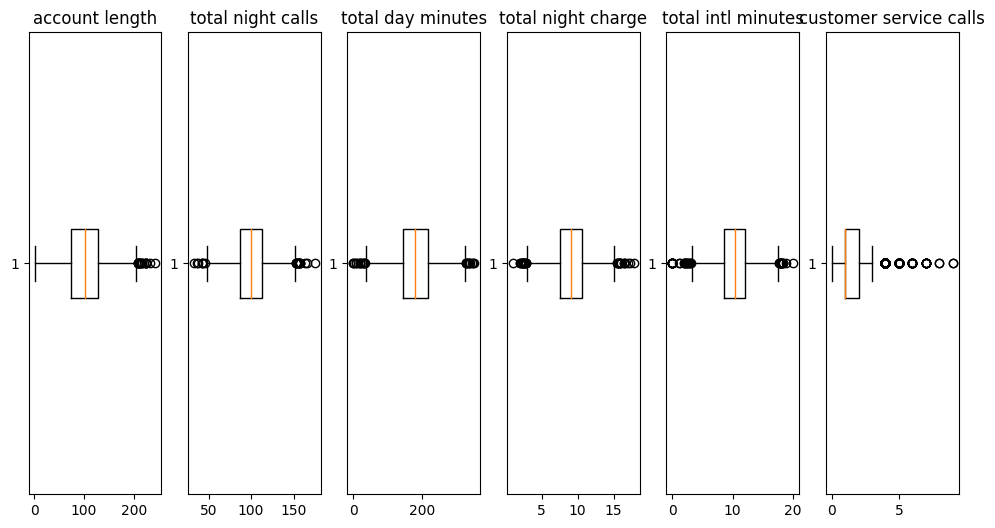

In [188]:
num_cols = ["account length", "total night calls", "total day minutes", "total night charge","total intl minutes", "customer service calls"]
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(col)

plt.show()


# df.boxplot(columns=[col for col in df.select_dtypes(include='int').columns])

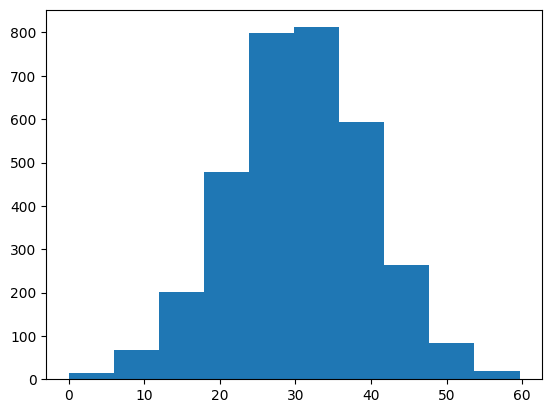

In [189]:
# Viewing relationships between Churn and other columns
plt.hist(df['total day charge'], bins=10)
# plt.xlabel('Column Name')
# plt.ylabel('Frequency')
# plt.title('Histogram of Column Name')
plt.show()

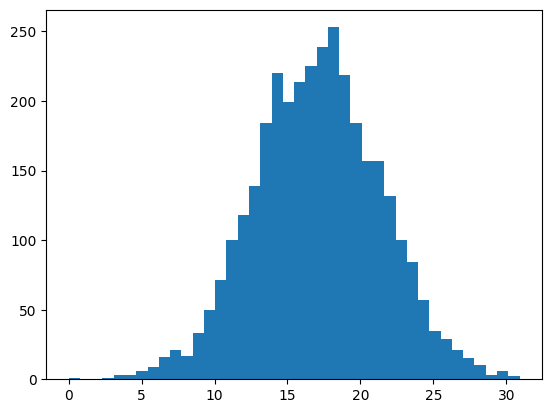

In [190]:
plt.hist(x=df['total eve charge'], bins='auto');

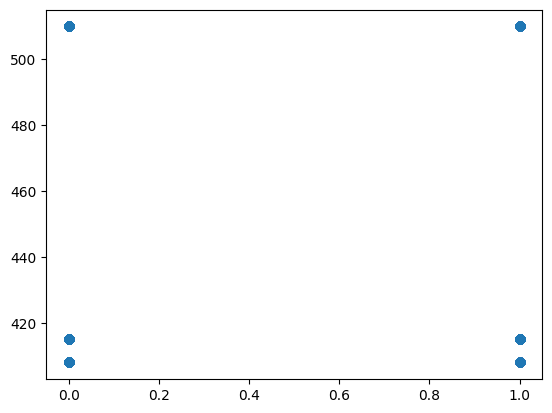

In [191]:
plt.scatter(x=df['churn'], y= df['area code']);

This relationship shows a possibility for one-hot encoding

In [192]:
# plt.scatter(x=df['churn'], y=df['state'])
# plt.yticks(rotation=30)
# plt.show()

In [193]:
# fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
# for i, col in enumerate(num_cols):
#     data_churn = data[data["churn"] == 1][col]
#     data_no_churn = data[data["churn"] == 0][col]
#     axes[i].hist(data_churn, alpha=0.5, label="Churn", bins=20)
#     axes[i].hist(data_no_churn, alpha=0.5, label="No churn", bins=20)
#     axes[i].set_title(col)
#     axes[i].legend()

# plt.show()

<AxesSubplot: xlabel='international plan', ylabel='count'>

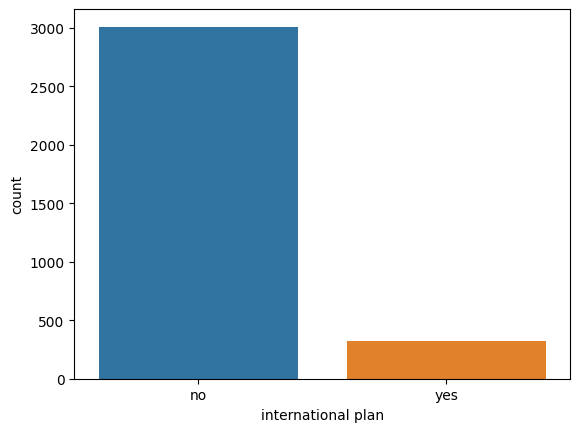

In [194]:
sns.countplot(data=df, x='international plan')

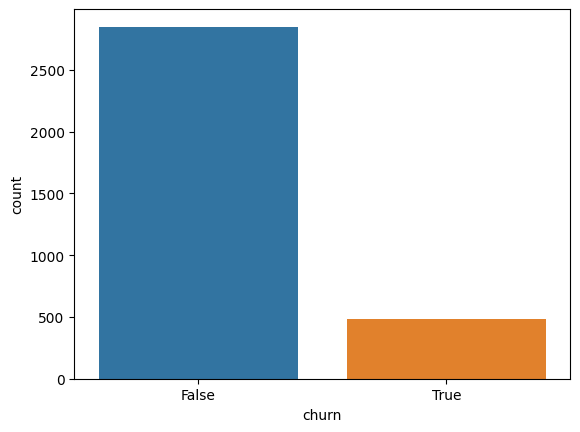

In [195]:
sns.countplot(data=df, x='churn');

From the visualizations above, we can see that there is imbalance in the dataset and we will thus need to standardize/regularize the dataset

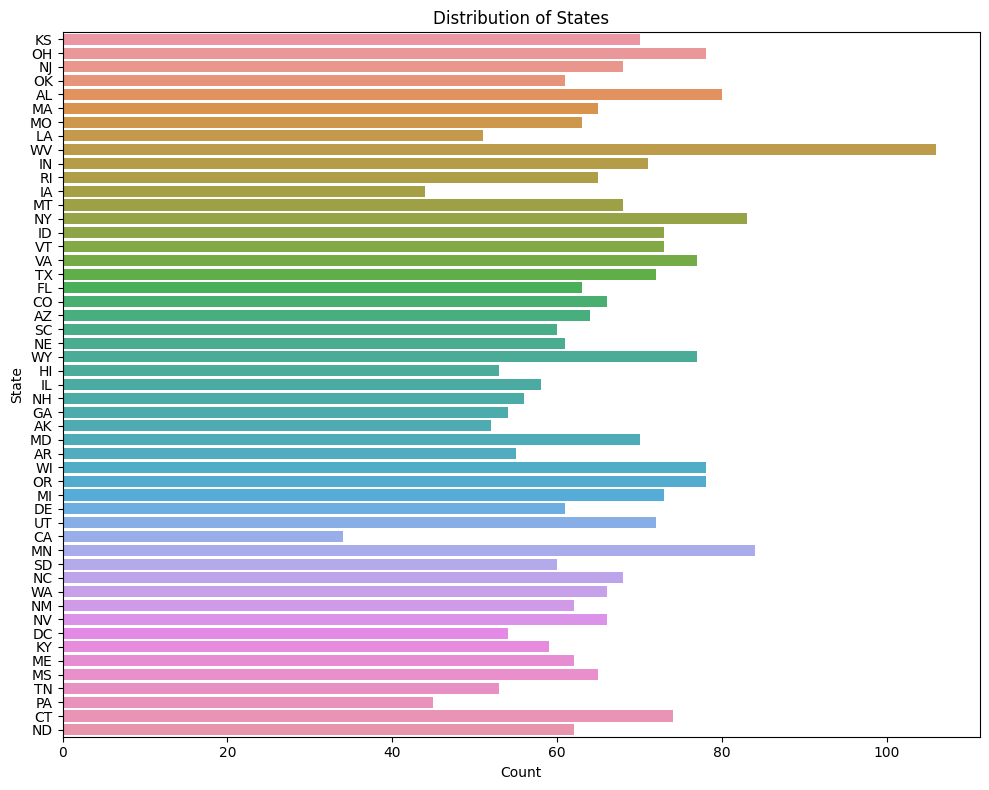

In [197]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df, y='state')
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of States')
plt.tight_layout()

plt.show()

/tmp/ipykernel_45802/2929036447.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_corr = df.corr()['churn']


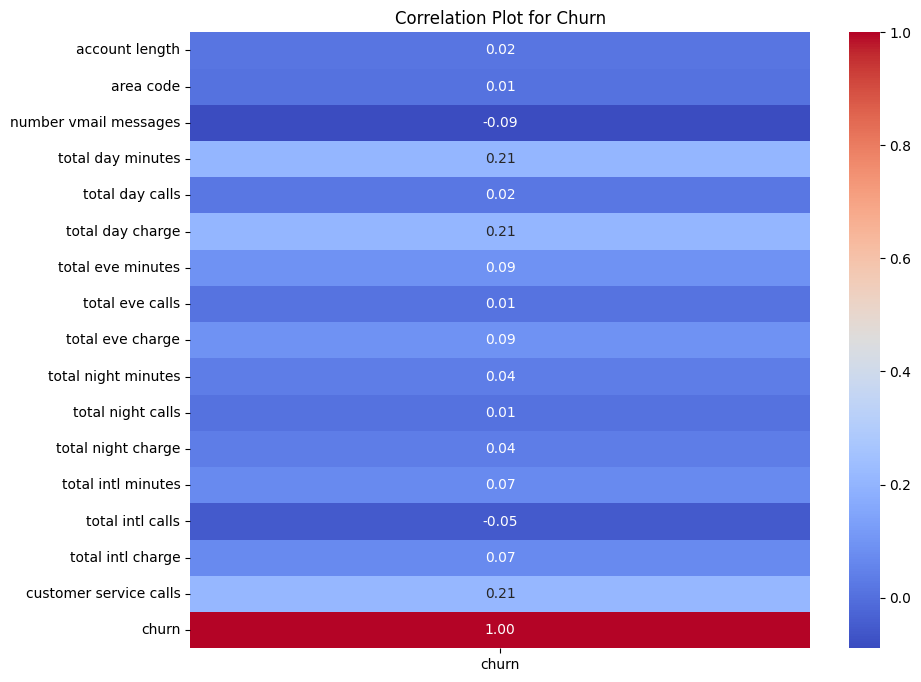

In [132]:
# Checking for correlation with the churn variable
churn_corr = df.corr()['churn']

# Visualizing
plt.figure(figsize=(10, 8))
sns.heatmap(churn_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot for Churn')
plt.show()

In [133]:
df['churn'] = df['churn'].replace({True: 1, False: 0}).astype(int)
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [134]:
print("Relationship between account length and churn:")
print(df.groupby("churn")["account length"].describe())

Relationship between account length and churn:
        count        mean       std  min   25%    50%    75%    max
churn                                                              
0      2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0
1       483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0


In [135]:
# One-hot-encoding some categorical columns
# Area code
df = pd.get_dummies(df, columns=['area code'], drop_first=True)

# Binary-encoding the other categorical columns
# Voicemail
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# International Plan
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})


In [136]:
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_415,area code_510
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,1,36,156.2,77,26.55,215.5,126,...,279.1,83,12.56,9.9,6,2.67,2,0,1,0
3329,WV,68,0,0,0,231.1,57,39.29,153.4,55,...,191.3,123,8.61,9.6,4,2.59,3,0,1,0
3330,RI,28,0,0,0,180.8,109,30.74,288.8,58,...,191.9,91,8.64,14.1,6,3.81,2,0,0,1
3331,CT,184,1,0,0,213.8,105,36.35,159.6,84,...,139.2,137,6.26,5.0,10,1.35,2,0,0,1


/tmp/ipykernel_45802/2520422521.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


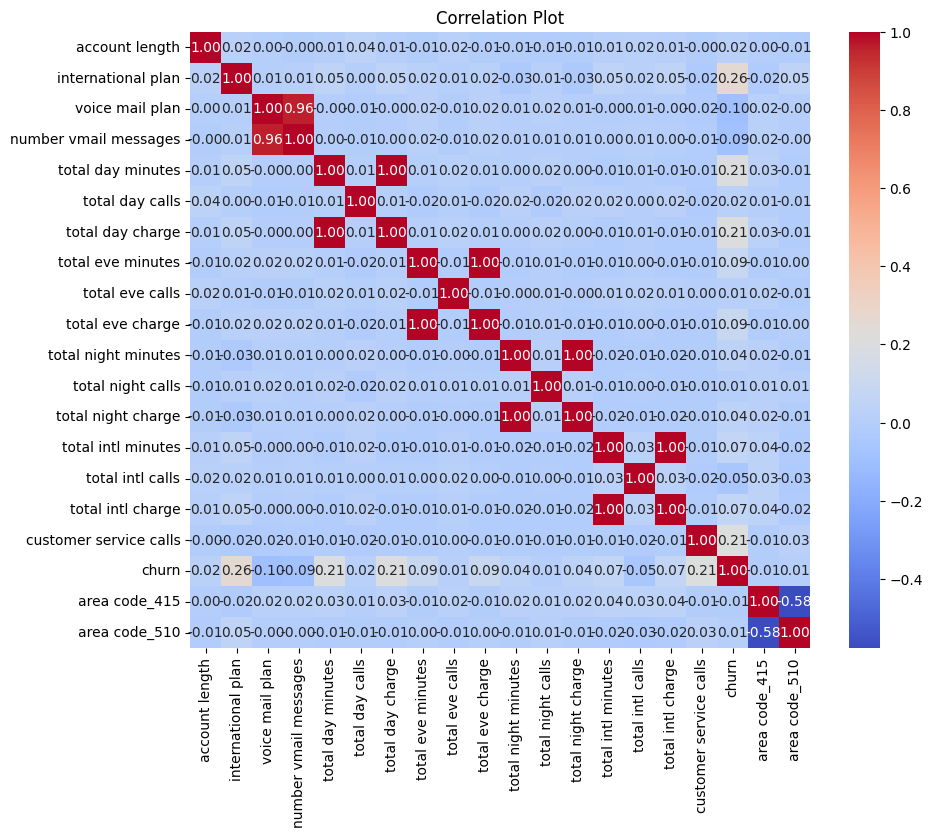

In [137]:
# Assuming `df` is your DataFrame
corr_matrix = df.corr()

# Create a correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

## Modeling

##### Baseline Model

In [138]:
X = df.drop(['churn', 'state'], axis=1)
y = df['churn']

# Perform a train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=132)

# # Split the dataset into training and testing sets
# X = data.drop(columns=["churn", "state", "area code"])
# y = data["churn"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
# Scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
# Logistic Regression
base_model = LogisticRegression(random_state=132)

base_model.fit(X_train_scaled, y_train)
y_base_pred = base_model.predict(X_test_scaled)

In [141]:
# Scoring 
base_score = base_model.score(X_test_scaled, y_test)
base_score

0.84

In [142]:
# Cross Validation
base_cv = cross_val_score(base_model, X_train_scaled, y_train)
base_cv

array([0.875803  , 0.88008565, 0.86509636, 0.84763948, 0.86480687])

In [143]:
base_report = classification_report(y_test, y_base_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       843
           1       0.48      0.21      0.29       157

    accuracy                           0.84      1000
   macro avg       0.67      0.58      0.60      1000
weighted avg       0.81      0.84      0.81      1000



In [144]:
# ROC Curve
base_roc_auc = roc_auc_score(y_test, y_base_pred)
base_roc_auc

0.583743228234014

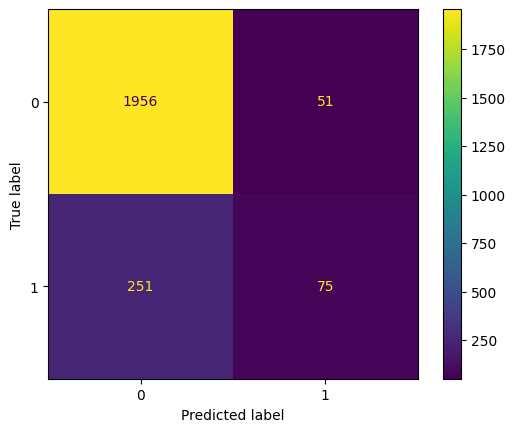

In [145]:
# Displaying a confusion matrix
ConfusionMatrixDisplay.from_estimator(base_model, X_train_scaled, y_train);

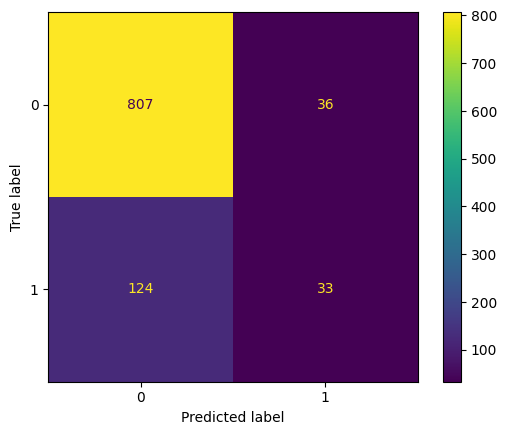

In [146]:
ConfusionMatrixDisplay.from_predictions(y_test, y_base_pred);

In [147]:
# # Make predictions on the training data
# y_train_pred = base_model.predict(X_train_scaled)

# # Compute the confusion matrix
# cm = confusion_matrix(y_train, y_train_pred)

# # Create ConfusionMatrixDisplay object
# cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=base_model.classes_)

# # Plot the confusion matrix
# cm_display.plot()

# # Add title and axis labels
# plt.title('Confusion Matrix - Training Data')

##### Decision Tree Classifier

In [148]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=132, max_depth=5)

tree.fit(X_train_scaled, y_train)
y_tree_pred = tree.predict(X_test_scaled)

# Scoring on trained data
tree_train_score = tree.score(X_train_scaled, y_train)
print('Trained data score: ', tree_train_score)

# Scoring on test data
tree_test_score = tree.score(X_test_scaled, y_test)
print('Test data score: ', tree_test_score)

Trained data score:  0.9554222031718816
Test data score:  0.938


In [149]:
# Cross Validation
tree_cv = cross_val_score(tree, X_train_scaled, y_train)
tree_cv

array([0.94218415, 0.93361884, 0.93147752, 0.92918455, 0.92918455])

In [150]:
# Report
tree_report = classification_report(y_test, y_tree_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       843
           1       0.89      0.69      0.78       157

    accuracy                           0.94      1000
   macro avg       0.92      0.84      0.87      1000
weighted avg       0.94      0.94      0.93      1000



In [151]:
tree_roc_auc = roc_auc_score(y_test, y_tree_pred)
tree_roc_auc

0.8362384870533657

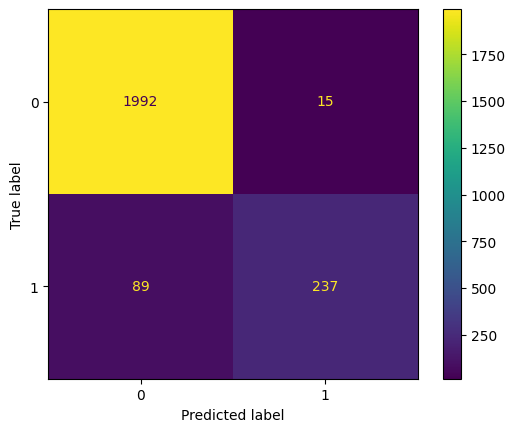

In [152]:
# Train Confusion Matrix
ConfusionMatrixDisplay.from_estimator(tree, X_train_scaled, y_train);

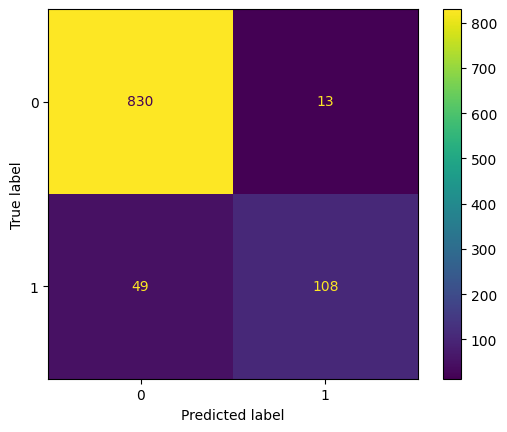

In [153]:
# Test Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_tree_pred);

##### KNN Model

In [154]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_scaled, y_train)
knn_y_pred = knn.predict(X_test_scaled)
knn_y_pred_proba = knn.predict_proba(X_test_scaled)

knn_y_pred_proba

array([[1.  , 0.  ],
       [0.75, 0.25],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25]])

In [155]:
# Scoring
knn_score = knn.score(X_train_scaled, y_train)
knn_score

0.9039862837548222

In [156]:
# Cross Validation
knn_cv = cross_val_score(knn, X_train, y_train)
knn_cv

array([0.88222698, 0.88008565, 0.88008565, 0.89484979, 0.8776824 ])

In [157]:
# Report 
knn_report = classification_report(y_test, knn_y_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       843
           1       0.82      0.20      0.33       157

    accuracy                           0.87      1000
   macro avg       0.85      0.60      0.63      1000
weighted avg       0.86      0.87      0.83      1000



In [158]:
knn_roc_auc = roc_auc_score(y_test, knn_y_pred)
knn_roc_auc

0.597758989354066

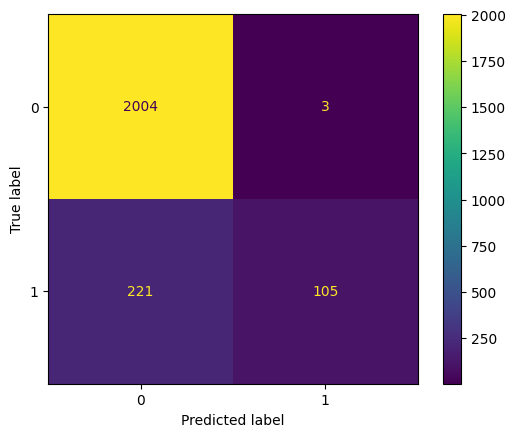

In [159]:
# With estimators
ConfusionMatrixDisplay.from_estimator(knn, X_train_scaled, y_train);

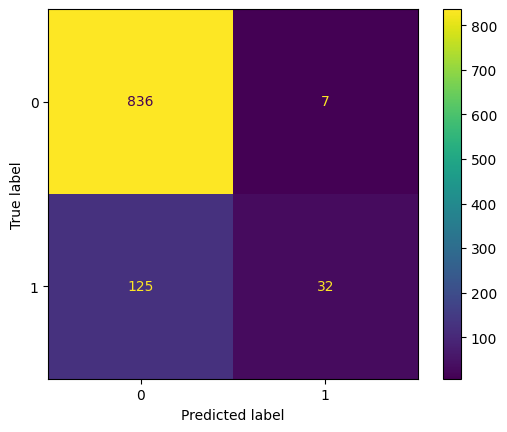

In [160]:
# With predictors
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_pred);

##### Random Forest

In [161]:
# Random Forest Classifier

clf = RandomForestClassifier(n_estimators=4, random_state=132)

clf.fit(X_train_scaled, y_train)
clf.fit(X_test, y_test)

y_clf_pred = clf.predict(X_test_scaled)

/home/pandora/anaconda3/envs/learn-env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [162]:
# Scoring
clf_score = clf.score(X_train_scaled, y_train)
clf_score

/home/pandora/anaconda3/envs/learn-env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8431204457779683

In [163]:
# Cross validation
clf_cv = cross_val_score(clf, X_train_scaled, y_train)
clf_cv

array([0.92291221, 0.92505353, 0.90364026, 0.92274678, 0.92060086])

In [164]:
# Report
clf_report = classification_report(y_test, y_clf_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       843
           1       0.44      0.35      0.39       157

    accuracy                           0.83      1000
   macro avg       0.66      0.63      0.65      1000
weighted avg       0.81      0.83      0.82      1000



In [165]:
clf_roc = roc_curve(y_test, y_clf_pred)
print(clf_roc)

(array([0.        , 0.08185053, 1.        ]), array([0.        , 0.35031847, 1.        ]), array([2, 1, 0]))


In [166]:
clf_roc_auc = roc_auc_score(y_test, y_clf_pred)
clf_roc_auc

0.6342339687648753

/home/pandora/anaconda3/envs/learn-env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


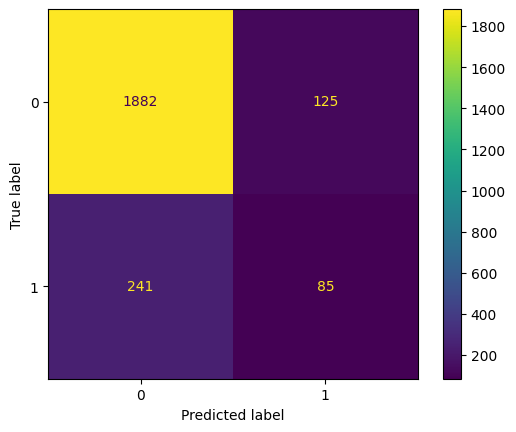

In [167]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_train_scaled, y_train);

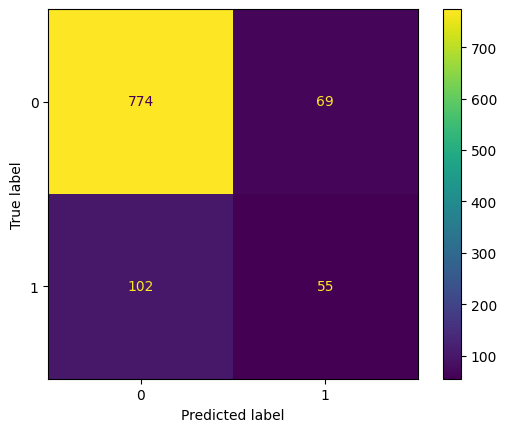

In [168]:
ConfusionMatrixDisplay.from_predictions(y_test, y_clf_pred);

##### Ridge & Lasso

In [169]:
# ridge = Ridge(random_state=132)

# ridge.fit(X_train_scaled, y_train)

In [170]:
# Sunthetic Minority Oversampling Technique
# # sm = SMOTE()

# sm.fit(X_train, y_train)

In [171]:
# pipe = Pipeline([('mms', MinMaxScaler()),
#                  ('tree', DecisionTreeClassifier(random_state=123))])

# # Create the grid parameter
# grid = [{'tree__max_depth': [None, 2, 6, 10], 
#          'tree__min_samples_split': [5, 10]}]


# # Create the grid, with "pipe" as the estimator
# gridsearch = GridSearchCV(estimator=pipe, 
#                           param_grid=grid, 
#                           scoring='accuracy', 
#                           cv=5)

## Evaluation

## Conclusion

#### Recommendation